In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../")
import electrostatic
# import nanonets_utils

plt.style.use(["science","bright","grid"])
# plt.style.use('seaborn-v0_8-whitegrid')
blue_color  = '#348ABD'
red_color   = '#A60628'

/home/jonasmensing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def display_network(net_class, fig, ax):

    G   = net_class.get_graph()
    pos = net_class.get_positions()

    ax.set_aspect('equal')
    for u,v in G.edges():
        x0,y0 = pos[u]; x1,y1 = pos[v]
        ax.plot([x0,x1],[y0,y1], 'black', lw=1)

    # Draw nanoparticle circles
    for i in range(net_class.N_particles):
        x, y = pos[i]
        circle = plt.Circle((x, y), net_class.radius_vals[i], fill=True,
                            edgecolor='black', lw=1, zorder=2, facecolor=blue_color)
        ax.add_patch(circle)

    # Draw electrodes and their connections
    for i in range(net_class.N_particles):
        e = net_class.net_topology[i, 0]
        if e != net_class.NO_CONNECTION:
            enode = -int(e)
            x, y = pos[enode]
            # Draw electrode circle
            circ = plt.Circle((x, y), net_class.ELECTRODE_RADIUS, fill=True,
                            edgecolor='black', lw=1, zorder=2, facecolor=red_color)
            ax.add_patch(circ)

    # Autoscale
    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    pad = max(np.max(net_class.radius_vals), net_class.ELECTRODE_RADIUS) + 1
    ax.set_xlim(min(xs) - pad, max(xs) + pad)
    ax.set_ylim(min(ys) - pad, max(ys) + pad)
    
    return fig, ax

# Networks w/o disorder

In [3]:
# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = electrostatic.NanoparticleElectrostatic()

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius()
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = electrostatic.NanoparticleElectrostatic()

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius()
random_net.pack_planar_circles()

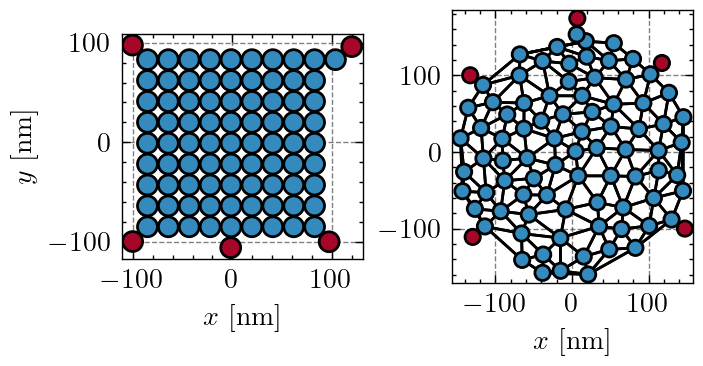

In [4]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(net_class=lattice_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(net_class=random_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")

In [ ]:
voltage_values = np.random.normal(size=len(electrode_pos)+1)

lattice_net.calc_capacitance_matrix()
lattice_net.calc_electrode_capacitance_matrix()
lattice_net.init_charge_vector(voltage_values)

c_mat   = lattice_net.get_capacitance_matrix()
c_e_mat = lattice_net.get_electrode_capacitance_matrix()
q_vec   = lattice_net.get_charge_vector()

print("Capacitance Matrix:\n", np.round(c_mat,2))
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))
print("Voltage Vector:\n", np.round(voltage_values,2))
print("Initial Charge Vector:\n", np.round(q_vec,2))

Capacitance Matrix:
 [[33.67 -2.56 -0.74 ... -0.13 -0.12 -0.11]
 [-2.56 36.7  -2.56 ... -0.14 -0.13 -0.12]
 [-0.74 -2.56 38.55 ... -0.15 -0.14 -0.13]
 ...
 [-0.13 -0.14 -0.15 ... 36.71 -2.56 -0.74]
 [-0.12 -0.13 -0.14 ... -2.56 34.15 -2.56]
 [-0.11 -0.12 -0.13 ... -0.74 -2.56 29.58]]
Electrode Capacitance Matrix:
 [[0.16 0.16 0.15 0.15 0.14 0.13 0.13 0.12 0.11 0.18 0.18 0.17 0.16 0.15
  0.14 0.14 0.13 0.12 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.24
  0.23 0.22 0.2  0.19 0.17 0.16 0.14 0.13 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.37 0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.51 0.44
  0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.81 0.6  0.44 0.34 0.28 0.23 0.2
  0.17 0.16 2.56 0.8  0.51 0.37 0.29 0.24 0.21 0.18 0.16 0.14]
 [2.56 0.81 0.51 0.37 0.29 0.24 0.21 0.18 0.16 0.81 0.6  0.44 0.34 0.28
  0.23 0.2  0.18 0.16 0.51 0.44 0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.37
  0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.24 0.23 0.22 0.2  0.19 0.17

# Networks with disorder

In [7]:
# Radius Disorder
r_mean, r_std       = 10.0, 2.0

# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = electrostatic.NanoparticleElectrostatic()

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius(mean_radius=r_mean, std_radius=r_std)
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = electrostatic.NanoparticleElectrostatic()

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius(mean_radius=r_mean, std_radius=r_std)
random_net.pack_planar_circles()

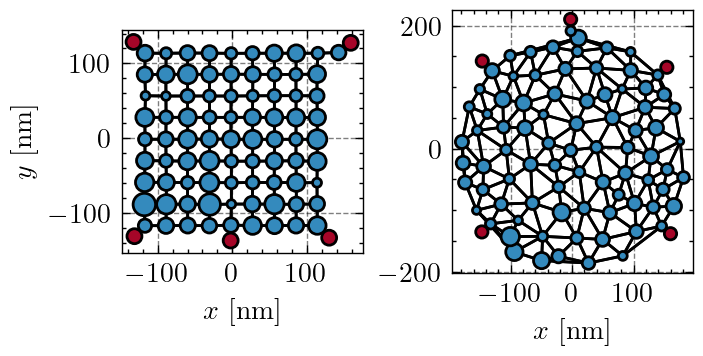

In [8]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(net_class=lattice_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(net_class=random_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")

In [9]:
voltage_values = np.random.normal(size=len(electrode_pos)+1)

random_net.calc_capacitance_matrix()
random_net.calc_electrode_capacitance_matrix()
random_net.init_charge_vector(voltage_values)

c_mat   = random_net.get_capacitance_matrix()
c_e_mat = random_net.get_electrode_capacitance_matrix()
q_vec   = random_net.get_charge_vector()

print("Capacitance Matrix:\n", np.round(c_mat,2))
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))
print("Voltage Vector:\n", np.round(voltage_values,2))
print("Initial Charge Vector:\n", np.round(q_vec,2))

Capacitance Matrix:
 [[17.15 -0.16 -0.09 ... -0.09 -0.59 -0.09]
 [-0.16 19.47 -0.1  ... -0.13 -0.16 -0.28]
 [-0.09 -0.1  28.59 ... -0.31 -0.09 -0.09]
 ...
 [-0.09 -0.13 -0.31 ... 26.69 -0.09 -0.12]
 [-0.59 -0.16 -0.09 ... -0.09 16.56 -0.09]
 [-0.09 -0.28 -0.09 ... -0.12 -0.09 18.96]]
Electrode Capacitance Matrix:
 [[0.11 0.09 0.13 0.17 0.07 0.31 0.09 0.17 0.1  0.09 0.17 0.11 0.28 0.24
  0.37 0.33 0.15 0.25 0.09 0.1  0.12 0.09 0.18 0.13 0.17 2.28 0.11 0.17
  0.33 0.12 0.1  0.12 0.21 0.19 0.24 0.06 0.08 0.14 0.09 0.08 0.08 0.19
  0.13 0.24 0.14 0.05 0.11 0.36 0.16 0.68 0.09 0.1  0.09 0.12 0.1  0.56
  0.12 0.15 0.06 0.17 0.14 0.31 0.1  0.1  0.19 0.13 0.07 0.11 1.01 0.15
  0.11 0.57 0.16 0.41 0.13 0.08 0.08 0.06 0.09 0.1  0.12 0.06]
 [0.25 0.34 0.1  0.13 0.08 0.19 0.16 0.09 0.23 0.26 0.1  0.11 0.19 0.09
  0.16 0.08 0.1  0.12 0.13 0.12 0.14 0.12 0.09 0.11 0.39 0.09 0.12 0.26
  0.13 0.12 0.5  0.11 0.23 0.27 0.18 0.08 0.14 0.18 0.57 0.06 0.07 0.11
  0.09 0.08 0.11 0.05 0.23 0.11 0.16 0.13 0.0

# Networks with two NP Types

In [16]:
# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = electrostatic.NanoparticleElectrostatic()

# Two NP Types
r_mean_1, r_std_1   = 10.0, 1.0
r_mean_2, r_std_2   = 20.0, 2.0
N_particles         = N_x * N_y
np_index_type_2     = np.random.choice(np.arange(N_particles),N_particles//3, replace=False)

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius(mean_radius=r_mean_1, std_radius=r_std_1)
lattice_net.update_nanoparticle_radius(np_index_type_2, mean_radius=r_mean_2, std_radius=r_std_2)
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = electrostatic.NanoparticleElectrostatic()

# Two NP Types
np_index_type_2 = np.random.choice(np.arange(N_particles),N_particles//3, replace=False)

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius(mean_radius=r_mean_1, std_radius=r_std_1)
random_net.update_nanoparticle_radius(np_index_type_2, mean_radius=r_mean_2, std_radius=r_std_2)
random_net.pack_planar_circles()

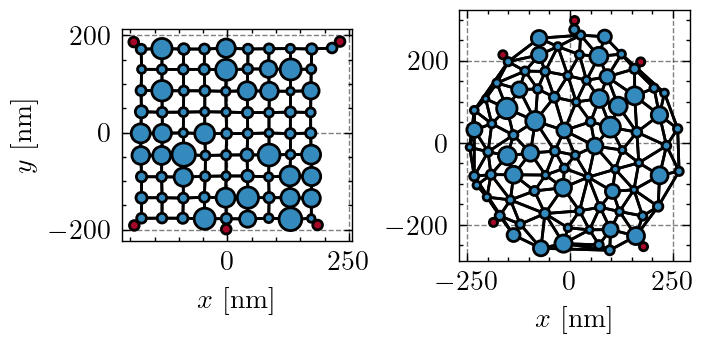

In [17]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(net_class=lattice_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(net_class=random_net, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")